In [ ]:
import pickle
import os
import numpy as np

hs_results = {}
hidden_sizes = [50, 100, 200]

for hs in hidden_sizes:
    file_path = os.path.join('/content', f'hs_results_{hs}.pkl')
    with open(file_path, 'rb') as f:
        hs_results[f"Hidden Size {hs}"] = pickle.load(f)

print("Loaded hidden size results:", list(hs_results.keys()))


Loaded hidden size results: ['Hidden Size 50', 'Hidden Size 100', 'Hidden Size 200']


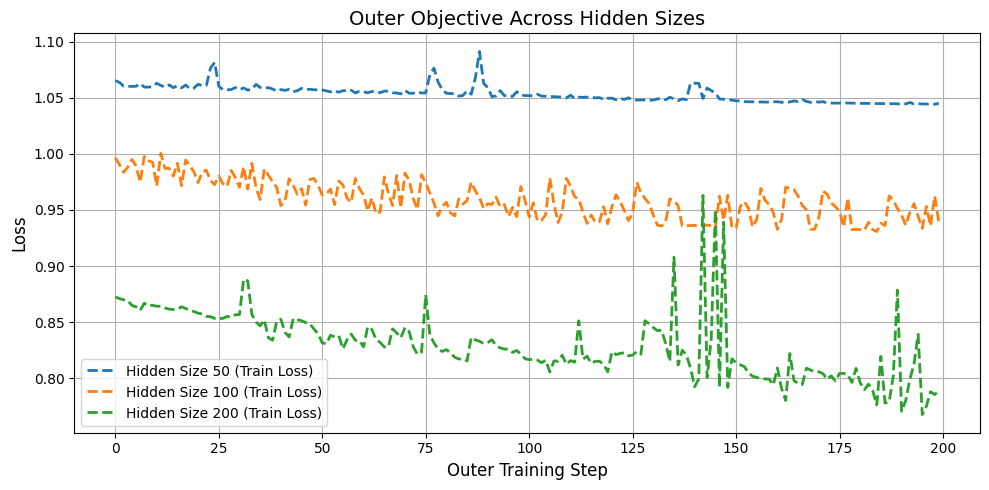

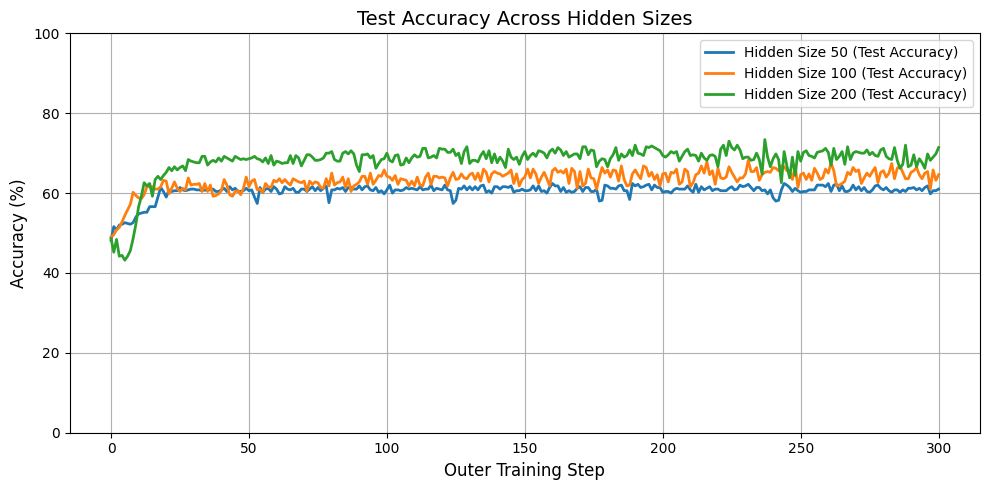

In [ ]:
import matplotlib.pyplot as plt

# Variables
t = range(0, 301, 1)

# Plot 1: Outer Objective (Training Losses)
plt.figure(figsize=(10, 5))
for name, result in hs_results.items():
    train_losses = result['train_losses'][-200:]  # Extract last 200 train losses
    plt.plot(train_losses, label=f"{name} (Train Loss)", linestyle='--', linewidth=2)

plt.xlabel("Outer Training Step", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Outer Objective Across Hidden Sizes", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Test Accuracy
plt.figure(figsize=(10, 5))
for name, result in hs_results.items():
    test_acc = [r[-1] for r in result['inner_test_accs']]  # Extract test accuracy
    plt.plot(t, test_acc, label=f"{name} (Test Accuracy)", linewidth=2)

plt.xlabel("Outer Training Step", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Test Accuracy Across Hidden Sizes", fontsize=14)
plt.ylim(0, 100)  # Adjust as needed
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


As the hidden layer size is increasing both train and test accuracy is inreasing. I also tried for size 400 and 500 but colab has RAM issure for these sizes or higher as these number of sizes require lot of RAM consumption even on GPU.

Try onserving the graphs for learned activation function for different sizes in different notebook, the size is incresing the distance between the curves is also increasing and for 50 all curves are quite closed or regular.

I needed to perform the experimet for differnt sizes in differnent notebook because when i tried in same notebook the experiment was giving memory error so i had to perform in different notebooks, combined the the pickles files obtained and plot the results.
